In [ ]:
!pip install kaggle --upgrade
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fedesoriano/company-bankruptcy-prediction

company-bankruptcy-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/company-bankruptcy-prediction.zip

Archive:  /content/company-bankruptcy-prediction.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [ ]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

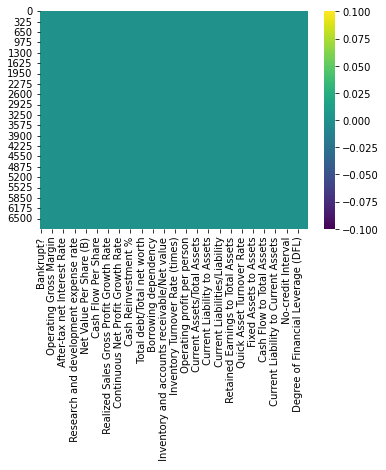

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')

In [ ]:
df.corr()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,-0.008395,-0.006083,-0.024232,-0.072356,-0.023063,-0.109706,-0.165399,-0.165465,-0.164784,-0.219560,-0.077516,-0.004692,-0.142051,-0.201395,-0.000458,-0.015168,-0.037783,-0.036820,-0.009401,-0.044431,0.065329,-0.016858,-0.051345,-0.002211,0.025058,-0.002681,0.012314,0.250161,-0.250161,0.016920,...,-0.044823,-0.100130,-0.003823,0.077921,0.194494,-0.077082,-0.001906,0.000822,-0.020809,-0.147221,0.153828,0.000778,-0.217779,-0.007137,0.139049,0.011929,0.025814,-0.002894,-0.018035,0.000479,0.066328,-0.020809,0.153828,0.139014,-0.070456,-0.043125,-0.115383,-0.058563,0.171306,0.139212,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.505407,0.505281,0.775006,0.379839,-0.015932,0.687201,0.750564,0.000591,0.036511,0.115083,0.115040,0.025234,0.019635,-0.021930,0.079906,0.296158,0.013196,-0.026336,0.003988,-0.022208,-0.261427,0.261427,0.002967,...,0.098820,0.235314,-0.010530,-0.046009,-0.210256,0.388151,-0.004447,0.013330,0.052783,0.103819,-0.142734,0.021508,0.650217,0.023450,-0.296019,0.005716,-0.027280,0.001824,-0.029477,0.011759,-0.009192,0.052783,-0.142734,-0.086535,0.262454,0.159699,0.504311,0.129002,-0.160725,-0.109272,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,0.075727,0.084334,0.288440,0.050362,0.225897,0.531799,0.531790,0.531821,0.76482

In [ ]:
df.corr()['Bankrupt?']

Bankrupt?                                                   1.000000
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Operating Gross Margin                                    -0.100043
                                                              ...   
 Liability to Equity                                        0.166812
 Degree of Financial Leverage (DFL)                         0.010508
 Interest Coverage Ratio (Interest expense to EBIT)        -0.005509
 Net Income Flag                                                 NaN
 Equity to Liability                                       -0.083048
Name: Bankrupt?, Length: 96, dtype: float64

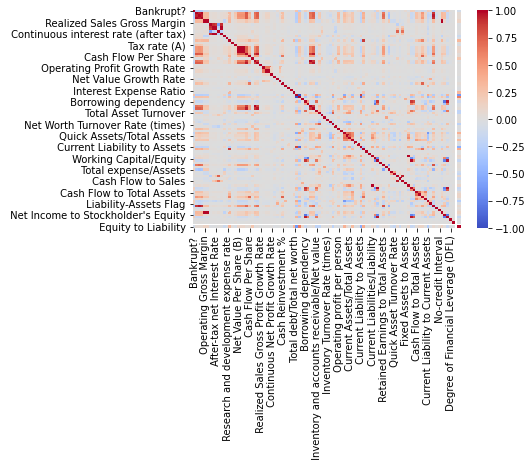

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm')

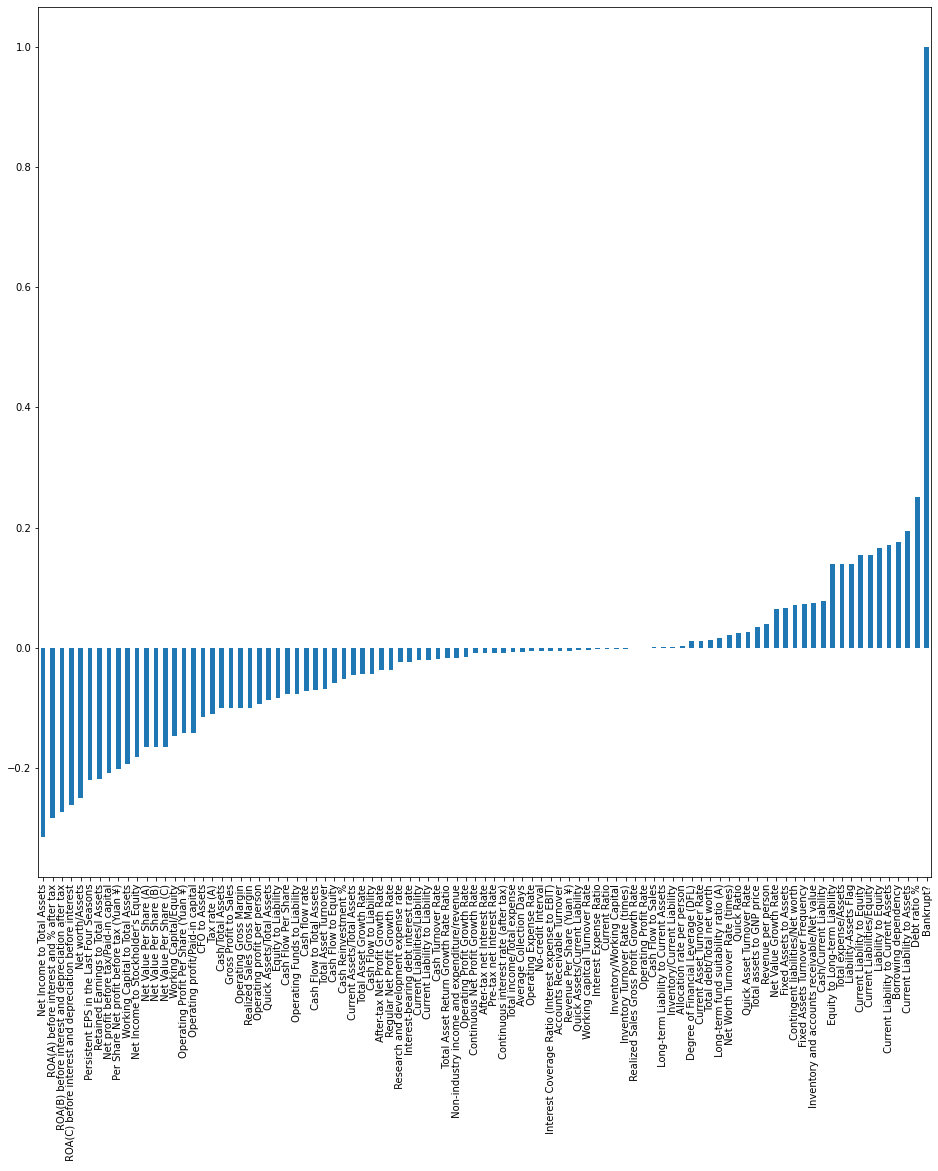

In [ ]:
plt.figure(figsize=(16,16))
df.corr()['Bankrupt?'].sort_values()[:-1].plot(kind='bar')

In [ ]:
#d1 = df.corr()

In [ ]:
df[' Net Income Flag'].unique()

array([1])

In [ ]:
df.drop(labels=[' Net Income Flag'], axis=1, inplace=True)

In [ ]:
df.columns.unique().value_counts()[' Current Liability to Liability']

1

In [ ]:
df.columns.unique().value_counts().sum()

95

In [ ]:
df.drop(labels=[' Current Liability to Liability'],axis=1,inplace=True)

In [ ]:
column = []

for i in df.corr()['Bankrupt?']:
  column.append(i)

In [ ]:
column

[1.0,
 -0.2608065575202611,
 -0.28294058493448865,
 -0.2730513178632931,
 -0.10004324405173082,
 -0.09944524958861552,
 -0.00022981739906378638,
 -0.008516547957069834,
 -0.00885722325965689,
 -0.01659263759117962,
 -0.008394858991376633,
 -0.006083225509124878,
 -0.024231968358059585,
 -0.07235555123147848,
 -0.023062808995369145,
 -0.10970566921434599,
 -0.16539902110860744,
 -0.16546475875891825,
 -0.1647839235411799,
 -0.2195596811907876,
 -0.07751645975300327,
 -0.004692038197307255,
 -0.1420505822212489,
 -0.201394834452866,
 -0.0004583837625679436,
 -0.015167946135345233,
 -0.03778297291183296,
 -0.03681967684145991,
 -0.009400902137393356,
 -0.04443102141801129,
 0.06532942436840884,
 -0.016857679442802694,
 -0.05134520428383571,
 -0.002211280245989384,
 0.025058288749528465,
 -0.002680933815997147,
 0.012313586033482628,
 0.25016096206661775,
 -0.25016096206661936,
 0.016919904808554796,
 0.1765429361615994,
 0.07045452479008069,
 -0.14111132382885744,
 -0.20785651999287655,
 

In [ ]:
len(column)

94

In [ ]:
column.index(-0.09944524958861552)

5

In [ ]:
column.index(-0.02080932682043792)

64

In [ ]:
column[64]

-0.02080932682043792

In [ ]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
df.iloc[:,77]

0       0.339077
1       0.329740
2       0.334777
3       0.331509
4       0.330726
          ...   
6814    0.330914
6815    0.329753
6816    0.326921
6817    0.329294
6818    0.326690
Name:  Current Liability to Equity, Length: 6819, dtype: float64

In [ ]:
df.iloc[:,64]

0       0.676269
1       0.308589
2       0.446027
3       0.615848
4       0.975007
          ...   
6814    0.786888
6815    0.849898
6816    0.553964
6817    0.893241
6818    1.000000
Name:  Current Liabilities/Liability, Length: 6819, dtype: float64

In [ ]:
indices = []
for i in column:
  print(i)
  if i<0.1 and i>-0.1:
    print(column.index(i))
    c = column.index(i)
    indices.append(c)

1.0
-0.2608065575202611
-0.28294058493448865
-0.2730513178632931
-0.10004324405173082
-0.09944524958861552
5
-0.00022981739906378638
6
-0.008516547957069834
7
-0.00885722325965689
8
-0.01659263759117962
9
-0.008394858991376633
10
-0.006083225509124878
11
-0.024231968358059585
12
-0.07235555123147848
13
-0.023062808995369145
14
-0.10970566921434599
-0.16539902110860744
-0.16546475875891825
-0.1647839235411799
-0.2195596811907876
-0.07751645975300327
20
-0.004692038197307255
21
-0.1420505822212489
-0.201394834452866
-0.0004583837625679436
24
-0.015167946135345233
25
-0.03778297291183296
26
-0.03681967684145991
27
-0.009400902137393356
28
-0.04443102141801129
29
0.06532942436840884
30
-0.016857679442802694
31
-0.05134520428383571
32
-0.002211280245989384
33
0.025058288749528465
34
-0.002680933815997147
35
0.012313586033482628
36
0.25016096206661775
-0.25016096206661936
0.016919904808554796
39
0.1765429361615994
0.07045452479008069
41
-0.14111132382885744
-0.20785651999287655
0.07527808207

In [ ]:
len(indices)

61

In [ ]:
indices.sort()

In [ ]:
for i in indices:
  print(i)

5
6
7
8
9
10
11
12
13
14
20
21
24
25
26
27
28
29
30
31
32
33
34
35
36
39
41
44
45
46
47
48
49
50
51
52
53
55
56
58
59
61
62
63
64
67
69
71
72
73
74
75
76
79
80
82
86
87
91
92
93


In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.2

In [ ]:
df.iloc[1]

Bankrupt?                                                   1.000000
 ROA(C) before interest and depreciation before interest    0.464291
 ROA(A) before interest and % after tax                     0.538214
 ROA(B) before interest and depreciation after tax          0.516730
 Operating Gross Margin                                     0.610235
                                                              ...   
 Net Income to Stockholder's Equity                         0.839969
 Liability to Equity                                        0.283846
 Degree of Financial Leverage (DFL)                         0.264577
 Interest Coverage Ratio (Interest expense to EBIT)         0.570175
 Equity to Liability                                        0.020794
Name: 1, Length: 94, dtype: float64

In [ ]:
df.iloc[:,1]

0       0.370594
1       0.464291
2       0.426071
3       0.399844
4       0.465022
          ...   
6814    0.493687
6815    0.475162
6816    0.472725
6817    0.506264
6818    0.493053
Name:  ROA(C) before interest and depreciation before interest, Length: 6819, dtype: float64

In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.2

In [ ]:
labels = df.columns

In [ ]:
labels

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
df.iloc[:,1].name

' ROA(C) before interest and depreciation before interest'

In [ ]:
labels = []
for i in indices:
  count = df.iloc[:,i].name
  labels.append(count)

In [ ]:
labels

[' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Cash Reinvestment %',
 ' Current Ratio',
 ' Quick Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Long-term fund suitability ratio (A)',
 ' Contingent liabilities/Net worth',
 ' Inventory and accounts receivable/Net value',
 ' Total Asset Turnover',
 ' Accounts Receivable Turnove

In [ ]:
count = 0
for column_name in labels:
  df.rename(columns={'{}'.format(column_name):indices[count]}, inplace=True)
  count = count + 1

In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,5,6,7,8,9,10,11,12,13,14,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,20,21,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),24,25,26,27,28,29,30,31,32,33,34,35,36,Debt ratio %,Net worth/Assets,39,...,Working Capital to Total Assets,55,56,Cash/Total Assets,58,59,Current Liability to Assets,61,62,63,64,Working Capital/Equity,Current Liabilities/Equity,67,Retained Earnings to Total Assets,69,Total expense/Assets,71,72,73,74,75,76,Current Liability to Equity,Equity to Long-term Liability,79,80,CFO to Assets,82,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,86,87,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,91,92,93
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,...,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.336731,0.277456,0.013879,0.446027,0.742729,0.334777,3.715116e-03,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,0.594502,7.610000e+08,0.671571,0.276179,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,0.154187,0.154187,0.154187,0.193722,0.321674,0.014368,0.077762,0.148603,0.022046,0.848005,0.689110,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.384077,0.004194,0.002896,0.630228,0.009572,0.151465,0.848535,0.005047,...,0.725754,0.161575,0.225815,0.018851,0.002961,1.010646e-03,0.098715,0.348716,0.276580,0.003540,0.615848,0.729825,0.331509,2.216520e-02,0.906902,0.001831,0.024161,8.140000e+09,6.050000e+09,0.593889,2.030000e+09,0.671519,0.559144,0.331509,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,

In [ ]:
df.iloc[:,5]

0       0.601457
1       0.610235
2       0.601364
3       0.583541
4       0.598783
          ...   
6814    0.604462
6815    0.598308
6816    0.610213
6817    0.607850
6818    0.627409
Name: 5, Length: 6819, dtype: float64

In [ ]:
df[5]

0       0.601457
1       0.610235
2       0.601364
3       0.583541
4       0.598783
          ...   
6814    0.604462
6815    0.598308
6816    0.610213
6817    0.607850
6818    0.627409
Name: 5, Length: 6819, dtype: float64

In [ ]:
indices

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 20,
 21,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 39,
 41,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 58,
 59,
 61,
 62,
 63,
 64,
 67,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 79,
 80,
 82,
 86,
 87,
 91,
 92,
 93]

In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,5,6,7,8,9,10,11,12,13,14,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,20,21,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),24,25,26,27,28,29,30,31,32,33,34,35,36,Debt ratio %,Net worth/Assets,39,...,Working Capital to Total Assets,55,56,Cash/Total Assets,58,59,Current Liability to Assets,61,62,63,64,Working Capital/Equity,Current Liabilities/Equity,67,Retained Earnings to Total Assets,69,Total expense/Assets,71,72,73,74,75,76,Current Liability to Equity,Equity to Long-term Liability,79,80,CFO to Assets,82,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,86,87,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,91,92,93
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,...,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.336731,0.277456,0.013879,0.446027,0.742729,0.334777,3.715116e-03,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,0.594502,7.610000e+08,0.671571,0.276179,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,0.154187,0.154187,0.154187,0.193722,0.321674,0.014368,0.077762,0.148603,0.022046,0.848005,0.689110,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.384077,0.004194,0.002896,0.630228,0.009572,0.151465,0.848535,0.005047,...,0.725754,0.161575,0.225815,0.018851,0.002961,1.010646e-03,0.098715,0.348716,0.276580,0.003540,0.615848,0.729825,0.331509,2.216520e-02,0.906902,0.001831,0.024161,8.140000e+09,6.050000e+09,0.593889,2.030000e+09,0.671519,0.559144,0.331509,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,

In [ ]:
df[5]

0       0.601457
1       0.610235
2       0.601364
3       0.583541
4       0.598783
          ...   
6814    0.604462
6815    0.598308
6816    0.610213
6817    0.607850
6818    0.627409
Name: 5, Length: 6819, dtype: float64

In [ ]:
df[64]

0       0.676269
1       0.308589
2       0.446027
3       0.615848
4       0.975007
          ...   
6814    0.786888
6815    0.849898
6816    0.553964
6817    0.893241
6818    1.000000
Name: 64, Length: 6819, dtype: float64

In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,5,6,7,8,9,10,11,12,13,14,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,20,21,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),24,25,26,27,28,29,30,31,32,33,34,35,36,Debt ratio %,Net worth/Assets,39,...,Working Capital to Total Assets,55,56,Cash/Total Assets,58,59,Current Liability to Assets,61,62,63,64,Working Capital/Equity,Current Liabilities/Equity,67,Retained Earnings to Total Assets,69,Total expense/Assets,71,72,73,74,75,76,Current Liability to Equity,Equity to Long-term Liability,79,80,CFO to Assets,82,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,86,87,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,91,92,93
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,...,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.336731,0.277456,0.013879,0.446027,0.742729,0.334777,3.715116e-03,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,0.594502,7.610000e+08,0.671571,0.276179,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,0.154187,0.154187,0.154187,0.193722,0.321674,0.014368,0.077762,0.148603,0.022046,0.848005,0.689110,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.384077,0.004194,0.002896,0.630228,0.009572,0.151465,0.848535,0.005047,...,0.725754,0.161575,0.225815,0.018851,0.002961,1.010646e-03,0.098715,0.348716,0.276580,0.003540,0.615848,0.729825,0.331509,2.216520e-02,0.906902,0.001831,0.024161,8.140000e+09,6.050000e+09,0.593889,2.030000e+09,0.671519,0.559144,0.331509,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,

In [ ]:
df.columns

Index([                                               'Bankrupt?',
       ' ROA(C) before interest and depreciation before interest',
                        ' ROA(A) before interest and % after tax',
             ' ROA(B) before interest and depreciation after tax',
                                        ' Operating Gross Margin',
                                                                5,
                                                                6,
                                                                7,
                                                                8,
                                                                9,
                                                               10,
                                                               11,
                                                               12,
                                                               13,
                                                              

In [ ]:
df.drop(labels=5,axis=1,inplace=True)

In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,6,7,8,9,10,11,12,13,14,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,20,21,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),24,25,26,27,28,29,30,31,32,33,34,35,36,Debt ratio %,Net worth/Assets,39,Borrowing dependency,...,Working Capital to Total Assets,55,56,Cash/Total Assets,58,59,Current Liability to Assets,61,62,63,64,Working Capital/Equity,Current Liabilities/Equity,67,Retained Earnings to Total Assets,69,Total expense/Assets,71,72,73,74,75,76,Current Liability to Equity,Equity to Long-term Liability,79,80,CFO to Assets,82,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,86,87,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,91,92,93
0,1,0.370594,0.424389,0.405750,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,...,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,...,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,0.379093,...,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.336731,0.277456,0.013879,0.446027,0.742729,0.334777,3.715116e-03,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,0.594502,7.610000e+08,0.671571,0.276179,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,0.154187,0.154187,0.154187,0.193722,0.321674,0.014368,0.077762,0.148603,0.022046,0.848005,0.689110,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.384077,0.004194,0.002896,0.630228,0.009572,0.151465,0.848535,0.005047,0.379743,...,0.725754,0.161575,0.225815,0.018851,0.002961,1.010646e-03,0.098715,0.348716,0.276580,0.003540,0.615848,0.729825,0.331509,2.216520e-02,0.906902,0.001831,0.024161,8.140000e+09,6.050000e+09,0.593889,2.030000e+09,0.671519,0.559144,0.331509,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022

In [ ]:
indices[1:]

[6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 20,
 21,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 39,
 41,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 58,
 59,
 61,
 62,
 63,
 64,
 67,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 79,
 80,
 82,
 86,
 87,
 91,
 92,
 93]

In [ ]:
for i in indices[1:]:
  print(i)
  df.drop(labels=i,axis=1,inplace=True)

6
7
8
9
10
11
12
13
14
20
21
24
25
26
27
28
29
30
31
32
33
34
35
36
39
41
44
45
46
47
48
49
50
51
52
53
55
56
58
59
61
62
63
64
67
69
71
72
73
74
75
76
79
80
82
86
87
91
92
93


In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Borrowing dependency,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Cash/Total Assets,Current Liability to Assets,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total expense/Assets,Current Liability to Equity,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity
0,1,0.370594,0.424389,0.405750,0.601457,0.000000,0.147950,0.147950,0.147950,0.169141,0.095921,0.138736,0.207576,0.792424,0.390284,0.095885,0.137757,0.672775,0.004094,0.147308,0.721275,0.339077,0.903225,0.064856,0.339077,0.126549,0.520382,0.118250,0,0.716845,0.601453,0.827890,0.290202
1,1,0.464291,0.538214,0.516730,0.610235,0.000000,0.182251,0.182251,0.182251,0.208944,0.093722,0.169918,0.171176,0.828824,0.376760,0.093743,0.168962,0.751111,0.014948,0.056963,0.731975,0.329740,0.931065,0.025516,0.329740,0.120916,0.567101,0.047775,0,0.795297,0.610237,0.839969,0.283846
2,1,0.426071,0.499019,0.472295,0.601450,0.000000,0.177911,0.177911,0.193713,0.180581,0.092338,0.142803,0.207516,0.792484,0.379093,0.092318,0.148036,0.829502,0.000991,0.098162,0.742729,0.334777,0.909903,0.021387,0.334777,0.117922,0.538491,0.025346,0,0.774670,0.601449,0.836774,0.290189
3,1,0.399844,0.451265,0.457733,0.583541,0.000000,0.154187,0.154187,0.154187,0.193722,0.077762,0.148603,0.151465,0.848535,0.379743,0.077727,0.147561,0.725754,0.018851,0.098715,0.729825,0.331509,0.906902,0.024161,0.331509,0.120760,0.604105,0.067250,0,0.739555,0.583538,0.834697,0.281721
4,1,0.465022,0.538432,0.522298,0.598783,0.000000,0.167502,0.167502,0.167502,0.212537,0.096898,0.168412,0.106509,0.893491,0.375025,0.096927,0.167461,0.751822,0.014161,0.110195,0.732000,0.330726,0.913850,0.026385,0.330726,0.110933,0.578469,0.047725,0,0.795016,0.598782,0.839973,0.278514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.113372,0.175045,0.175045,0.175045,0.216602,0.098200,0.172102,0.124618,0.875382,0.373823,0.098222,0.171111,0.817769,0.099481,0.103838,0.736716,0.330914,0.925611,0.019060,0.330914,0.112622,0.587178,0.027951,0,0.799927,0.604455,0.840359,0.279606
6815,0,0.475162,0.538269,0.524172,0.598308,0.371596,0.181324,0.181324,0.181324,0.216697,0.098608,0.172780,0.099253,0.900747,0.372505,0.098572,0.171805,0.793387,0.080337,0.089901,0.734584,0.329753,0.932629,0.011118,0.329753,0.112329,0.569498,0.031470,0,0.799748,0.598306,0.840306,0.278132
6816,0,0.472725,0.533744,0.520638,0.610444,0.490839,0.269521,0.269521,0.269521,0.210929,0.100073,0.173232,0.038939,0.961061,0.369637,0.100103,0.172287,0.866047,0.412885,0.024414,0.737432,0.326921,0.932000,0.035446,0.326921,0.110933,0.589341,0.007542,0,0.797778,0.610441,0.840138,0.275789
6817,0,0.506264,0.559911,0.554045,0.607850,0.181294,0.213392,0.213392,0.213392,0.228326,0.111799,0.185584,0.086979,0.913021,0.369649,0.111722,0.182498,0.832340,0.112238,0.083199,0.736713,0.329294,0.939613,0.016443,0.329294,0.110957,0.678338,0.022916,0,0.811808,0.607846,0.841084,0.277547


In [ ]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Tax rate (A)', ' Net Value Per Share (B)',
       ' Net Value Per Share (A)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Working Capital to Total Assets', ' Cash/Total Assets',
       ' Current Liability to Assets', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Retained Earnings to Total Assets',
       ' Total expense/Assets', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' CFO to Assets',
       ' Current Liabili

In [ ]:
from google.colab import files

df.to_csv('final_df.csv', encoding = 'utf-8-sig')

In [ ]:
files.download('final_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Borrowing dependency,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Cash/Total Assets,Current Liability to Assets,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total expense/Assets,Current Liability to Equity,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity
0,1,0.370594,0.424389,0.405750,0.601457,0.000000,0.147950,0.147950,0.147950,0.169141,0.095921,0.138736,0.207576,0.792424,0.390284,0.095885,0.137757,0.672775,0.004094,0.147308,0.721275,0.339077,0.903225,0.064856,0.339077,0.126549,0.520382,0.118250,0,0.716845,0.601453,0.827890,0.290202
1,1,0.464291,0.538214,0.516730,0.610235,0.000000,0.182251,0.182251,0.182251,0.208944,0.093722,0.169918,0.171176,0.828824,0.376760,0.093743,0.168962,0.751111,0.014948,0.056963,0.731975,0.329740,0.931065,0.025516,0.329740,0.120916,0.567101,0.047775,0,0.795297,0.610237,0.839969,0.283846
2,1,0.426071,0.499019,0.472295,0.601450,0.000000,0.177911,0.177911,0.193713,0.180581,0.092338,0.142803,0.207516,0.792484,0.379093,0.092318,0.148036,0.829502,0.000991,0.098162,0.742729,0.334777,0.909903,0.021387,0.334777,0.117922,0.538491,0.025346,0,0.774670,0.601449,0.836774,0.290189
3,1,0.399844,0.451265,0.457733,0.583541,0.000000,0.154187,0.154187,0.154187,0.193722,0.077762,0.148603,0.151465,0.848535,0.379743,0.077727,0.147561,0.725754,0.018851,0.098715,0.729825,0.331509,0.906902,0.024161,0.331509,0.120760,0.604105,0.067250,0,0.739555,0.583538,0.834697,0.281721
4,1,0.465022,0.538432,0.522298,0.598783,0.000000,0.167502,0.167502,0.167502,0.212537,0.096898,0.168412,0.106509,0.893491,0.375025,0.096927,0.167461,0.751822,0.014161,0.110195,0.732000,0.330726,0.913850,0.026385,0.330726,0.110933,0.578469,0.047725,0,0.795016,0.598782,0.839973,0.278514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.113372,0.175045,0.175045,0.175045,0.216602,0.098200,0.172102,0.124618,0.875382,0.373823,0.098222,0.171111,0.817769,0.099481,0.103838,0.736716,0.330914,0.925611,0.019060,0.330914,0.112622,0.587178,0.027951,0,0.799927,0.604455,0.840359,0.279606
6815,0,0.475162,0.538269,0.524172,0.598308,0.371596,0.181324,0.181324,0.181324,0.216697,0.098608,0.172780,0.099253,0.900747,0.372505,0.098572,0.171805,0.793387,0.080337,0.089901,0.734584,0.329753,0.932629,0.011118,0.329753,0.112329,0.569498,0.031470,0,0.799748,0.598306,0.840306,0.278132
6816,0,0.472725,0.533744,0.520638,0.610444,0.490839,0.269521,0.269521,0.269521,0.210929,0.100073,0.173232,0.038939,0.961061,0.369637,0.100103,0.172287,0.866047,0.412885,0.024414,0.737432,0.326921,0.932000,0.035446,0.326921,0.110933,0.589341,0.007542,0,0.797778,0.610441,0.840138,0.275789
6817,0,0.506264,0.559911,0.554045,0.607850,0.181294,0.213392,0.213392,0.213392,0.228326,0.111799,0.185584,0.086979,0.913021,0.369649,0.111722,0.182498,0.832340,0.112238,0.083199,0.736713,0.329294,0.939613,0.016443,0.329294,0.110957,0.678338,0.022916,0,0.811808,0.607846,0.841084,0.277547


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


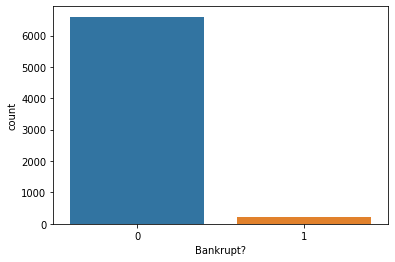

In [ ]:
sns.countplot(df['Bankrupt?'])

In [ ]:
df['Bankrupt?']

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [ ]:
df = df.sample(frac=1)

In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Borrowing dependency,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Cash/Total Assets,Current Liability to Assets,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total expense/Assets,Current Liability to Equity,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity
2788,0,0.491152,0.535543,0.538787,0.609060,0.785403,0.169946,0.169946,0.169946,0.215751,0.100318,0.171876,0.066542,0.933458,0.371094,0.099989,0.170749,0.760693,0.026310,0.067318,0.732459,0.328475,0.920778,0.025002,0.328475,0.110983,0.621410,0.041341,0,0.797270,0.609062,0.840119,0.276710
3934,0,0.490274,0.538541,0.538947,0.602920,0.049701,0.199191,0.199191,0.199191,0.218493,0.098689,0.171726,0.120507,0.879493,0.375129,0.098604,0.170651,0.768086,0.026528,0.051782,0.733141,0.328487,0.936346,0.012716,0.328487,0.122798,0.588439,0.035028,0,0.798301,0.602916,0.840224,0.279338
6755,0,0.525130,0.551461,0.574602,0.623099,0.062759,0.200244,0.200244,0.200244,0.227664,0.110170,0.178203,0.133114,0.866886,0.376834,0.110134,0.177257,0.767336,0.117659,0.063903,0.733178,0.329246,0.934734,0.027301,0.329246,0.124348,0.631916,0.037329,0,0.806106,0.623098,0.840896,0.280200
4388,0,0.505631,0.602976,0.556561,0.598164,0.081385,0.177995,0.177995,0.177995,0.225017,0.094862,0.187693,0.102730,0.897270,0.374893,0.094883,0.185846,0.828147,0.036983,0.076044,0.736835,0.329257,0.943831,0.023380,0.329257,0.115713,0.567826,0.022470,0,0.832189,0.598166,0.842617,0.278312
1650,0,0.497587,0.560892,0.541946,0.598149,0.278874,0.196705,0.196705,0.196705,0.228609,0.120267,0.187241,0.180639,0.819361,0.381749,0.120214,0.186170,0.871685,0.018438,0.098503,0.744696,0.332824,0.935319,0.017630,0.332824,0.132767,0.530799,0.020216,0,0.808084,0.598149,0.841476,0.285115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5921,0,0.492614,0.558929,0.553349,0.606697,0.000000,0.185117,0.185117,0.185117,0.225017,0.098770,0.176772,0.107356,0.892644,0.370930,0.098775,0.175545,0.815831,0.039019,0.089793,0.736155,0.329902,0.937147,0.038332,0.329902,0.113190,0.594817,0.026571,0,0.811635,0.606698,0.841183,0.278561
815,0,0.481548,0.552279,0.532577,0.603821,0.143436,0.178332,0.178332,0.178332,0.225111,0.106262,0.181442,0.194062,0.805938,0.383307,0.106258,0.180507,0.816305,0.210537,0.199857,0.739755,0.341391,0.936111,0.013860,0.341391,0.110933,0.641071,0.035279,0,0.808121,0.603823,0.841667,0.287322
6687,0,0.622288,0.707697,0.689330,0.614293,0.000000,0.290885,0.290885,0.290885,0.316347,0.090546,0.254651,0.025456,0.974544,0.369637,0.090543,0.250486,0.807288,0.063748,0.009658,0.734492,0.326456,0.966794,0.007911,0.326456,0.110933,0.558054,0.006380,0,0.875503,0.614294,0.844092,0.275407
1845,0,0.497538,0.565362,0.551421,0.611345,0.000000,0.194219,0.194219,0.194219,0.227380,0.119046,0.181216,0.095595,0.904405,0.371871,0.119074,0.180235,0.884576,0.079792,0.099783,0.740111,0.330074,0.942542,0.039803,0.330074,0.110933,0.649771,0.019176,0,0.816203,0.611345,0.841429,0.277950


In [ ]:
X = df.drop(labels=['Bankrupt?'],axis=1)
y = df['Bankrupt?']

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE()

In [ ]:
X, y = sm.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y)

In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
y_test

,Bankrupt?
11716,1
12382,1
8822,1
10887,1
12367,1
...,...
5984,0
1096,0
6993,1
7181,1


In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
y_train

,Bankrupt?
11088,1
9876,1
6867,1
369,0
6579,0
...,...
829,0
3261,0
4121,0
9532,1


In [ ]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Borrowing dependency,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Cash/Total Assets,Current Liability to Assets,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total expense/Assets,Current Liability to Equity,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity
11088,0.433557,0.471187,0.477595,0.601186,0.000000,0.156840,0.156840,0.156840,0.172715,0.086363,0.132139,0.239380,0.760620,0.396413,0.086371,0.131097,0.663796,0.008624,0.177477,0.713075,0.350360,0.912661,0.040456,0.350360,0.127004,0.589256,0.121918,0,0.750864,0.601185,0.829021,0.302400
9876,0.488678,0.546706,0.540582,0.610951,0.231528,0.216006,0.216006,0.216250,0.221359,0.108251,0.177128,0.131596,0.868404,0.377316,0.108246,0.175230,0.825323,0.161906,0.077381,0.737618,0.329915,0.937024,0.014848,0.329915,0.121040,0.551375,0.023326,0,0.801413,0.610952,0.840476,0.280203
6867,0.409861,0.457812,0.461432,0.588354,0.000000,0.154694,0.154694,0.154694,0.193253,0.081974,0.150711,0.153757,0.846243,0.379762,0.081950,0.149674,0.729787,0.014807,0.102147,0.730147,0.331790,0.905117,0.027226,0.331790,0.120068,0.582271,0.063309,0,0.742523,0.588351,0.834904,0.281944
369,0.605616,0.646097,0.631618,0.604556,0.250936,0.216004,0.216004,0.216004,0.276638,0.124176,0.238081,0.107083,0.892917,0.371112,0.124180,0.237154,0.757158,0.044751,0.043680,0.732346,0.327988,0.954887,0.002335,0.327988,0.113948,0.632325,0.041310,0,0.859853,0.604554,0.844687,0.278545
6579,0.554624,0.610390,0.595696,0.605745,0.219658,0.207239,0.207239,0.207239,0.258769,0.142252,0.215787,0.157693,0.842307,0.379492,0.142215,0.214833,0.845648,0.061704,0.102413,0.740309,0.331955,0.944052,0.017438,0.331955,0.123085,0.509751,0.023599,0,0.831914,0.605747,0.843600,0.282329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,0.458880,0.431313,0.524546,0.607403,0.000000,0.169862,0.169862,0.169862,0.213293,0.097793,0.131280,0.147051,0.852949,0.377257,0.097766,0.130390,0.745270,0.072281,0.055022,0.731486,0.329066,0.908917,0.056974,0.329066,0.123534,0.566887,0.054088,0,0.727962,0.607404,0.833787,0.281322
3261,0.527422,0.602104,0.588790,0.622508,0.000000,0.198896,0.198896,0.198896,0.241940,0.119697,0.193643,0.084409,0.915591,0.370995,0.118692,0.189752,0.874321,0.489488,0.062175,0.739088,0.328479,0.944232,0.032119,0.328479,0.114126,0.620195,0.014836,0,0.834726,0.622509,0.842561,0.277433
4121,0.433969,0.492477,0.480379,0.605356,0.000000,0.161898,0.161898,0.161898,0.198922,0.098445,0.157566,0.166097,0.833903,0.377825,0.098401,0.156534,0.844430,0.020467,0.110168,0.740729,0.332788,0.922638,0.054970,0.332788,0.117247,0.554838,0.024640,0,0.769482,0.605354,0.837255,0.283235
9532,0.373914,0.416930,0.403928,0.604145,0.000000,0.151133,0.151133,0.151133,0.173510,0.081083,0.141677,0.176847,0.823153,0.380561,0.081328,0.141416,0.792158,0.019966,0.134434,0.736171,0.334925,0.899954,0.082641,0.334925,0.122590,0.550094,0.035809,0,0.706035,0.604143,0.829820,0.284701


In [ ]:
X_test

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Borrowing dependency,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Cash/Total Assets,Current Liability to Assets,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total expense/Assets,Current Liability to Equity,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity
11716,0.449050,0.498493,0.500222,0.600790,0.000000,0.141984,0.141984,0.141984,0.201594,0.094364,0.150563,0.233976,0.766024,0.395207,0.094357,0.158753,0.716484,0.036666,0.161266,0.725305,0.346130,0.887925,0.034520,0.346130,0.141127,0.552121,0.063815,0,0.772152,0.600786,0.834907,0.299363
12382,0.490354,0.562489,0.554573,0.601082,0.000000,0.172186,0.172186,0.172575,0.225104,0.107202,0.173542,0.203870,0.796130,0.392740,0.107187,0.172560,0.751746,0.002275,0.106502,0.732039,0.335234,0.929894,0.010972,0.335234,0.143442,0.574571,0.047707,0,0.805335,0.601080,0.841459,0.289452
8822,0.457407,0.501921,0.501724,0.609561,0.000000,0.177712,0.177712,0.177712,0.187634,0.103768,0.145811,0.215389,0.784611,0.386843,0.103773,0.144808,0.664722,0.004484,0.149579,0.719055,0.340626,0.923647,0.029214,0.340626,0.111679,0.572574,0.137583,0,0.773114,0.609560,0.836152,0.292415
10887,0.439144,0.480251,0.489429,0.593105,0.000000,0.163895,0.163895,0.163895,0.194838,0.080361,0.152474,0.151242,0.848758,0.376875,0.080941,0.152419,0.768023,0.026277,0.126537,0.733309,0.333015,0.915591,0.024349,0.333015,0.117191,0.539039,0.043277,0,0.762273,0.593104,0.836823,0.281724
12367,0.411916,0.474604,0.456442,0.593734,0.000000,0.146590,0.146590,0.146590,0.179626,0.085436,0.142027,0.232057,0.767943,0.404430,0.085401,0.141051,0.706262,0.049797,0.197021,0.723498,0.349861,0.910658,0.037368,0.349861,0.126105,0.602427,0.067006,0,0.748986,0.593735,0.830104,0.298470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,0.494808,0.554786,0.548745,0.598971,0.104970,0.170789,0.170789,0.170789,0.220478,0.104959,0.174512,0.179279,0.820721,0.383410,0.104931,0.173562,0.824207,0.041263,0.157280,0.739600,0.336658,0.933500,0.029005,0.336658,0.118011,0.454422,0.031646,0,0.802340,0.598971,0.840788,0.284920
1096,0.336226,0.391300,0.382515,0.599886,0.000000,0.149509,0.149509,0.149509,0.181337,0.076134,0.140770,0.147081,0.852919,0.375957,0.076140,0.141030,0.774265,0.009850,0.120188,0.733864,0.332478,0.888690,0.075289,0.332478,0.117541,0.485829,0.039570,0,0.697138,0.599884,0.830950,0.281325
6993,0.422176,0.471171,0.466874,0.594458,0.000000,0.153083,0.153083,0.153083,0.187667,0.083523,0.148595,0.210821,0.789179,0.388022,0.083512,0.147597,0.773454,0.058077,0.193935,0.735504,0.343990,0.914880,0.033236,0.343990,0.118815,0.571386,0.042975,0,0.756497,0.594454,0.833721,0.291336
7181,0.453130,0.516743,0.507970,0.605794,0.000000,0.176971,0.176971,0.176971,0.200317,0.087554,0.158851,0.188063,0.811937,0.381141,0.087895,0.158174,0.812783,0.082432,0.147080,0.739000,0.336815,0.927319,0.034151,0.336815,0.123050,0.561507,0.032918,0,0.783574,0.605791,0.838488,0.286295


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


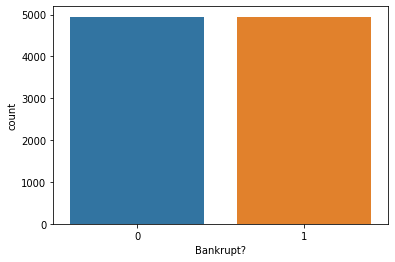

In [ ]:
sns.countplot(y_train['Bankrupt?'])

**THE DATA PRE-PROCESSING HAS BEEN COMPLETED AND NOW WE WOULD PROCEED WITH MODEL TRAINING. WE ARE USING THREE DIFFERENT MODELS (ANN, KNN & RANDOM FOREST)**

***ANN***

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='rmsprop')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=25, mode='min')

In [ ]:
validation_data = (X_test, y_test)

In [ ]:
result = model.fit(X_train,y_train, validation_data=validation_data,epochs=600,callbacks=[early_stop])

Epoch 1/600
310/310 [==============================] - 4s 6ms/step - loss: 0.4472 - accuracy: 0.7942 - val_loss: 0.3356 - val_accuracy: 0.8615
Epoch 2/600
310/310 [==============================] - 2s 5ms/step - loss: 0.3513 - accuracy: 0.8499 - val_loss: 0.5018 - val_accuracy: 0.7521
Epoch 3/600
310/310 [==============================] - 2s 5ms/step - loss: 0.3353 - accuracy: 0.8561 - val_loss: 0.3518 - val_accuracy: 0.8597
Epoch 4/600
310/310 [==============================] - 2s 5ms/step - loss: 0.3271 - accuracy: 0.8632 - val_loss: 0.3182 - val_accuracy: 0.8667
Epoch 5/600
310/310 [==============================] - 2s 5ms/step - loss: 0.3209 - accuracy: 0.8640 - val_loss: 0.3122 - val_accuracy: 0.8691
Epoch 6/600
310/310 [==============================] - 2s 5ms/step - loss: 0.3180 - accuracy: 0.8681 - val_loss: 0.4825 - val_accuracy: 0.8088
Epoch 7/600
310/310 [==============================] - 2s 6ms/step - loss: 0.3131 - accuracy: 0.8700 - val_loss: 0.3226 - val_accuracy: 0.8609

In [ ]:
loss = pd.DataFrame(model.history.history)

In [ ]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.447230,0.794201,0.335649,0.861515
1,0.351343,0.849869,0.501765,0.752121
2,0.335312,0.856133,0.351839,0.859697
3,0.327065,0.863205,0.318176,0.866667
4,0.320866,0.864013,0.312205,0.869091
...,...,...,...,...
89,0.265724,0.891695,0.263846,0.893939
90,0.266924,0.890281,0.272333,0.891212
91,0.261841,0.894221,0.265667,0.888485
92,0.265491,0.890382,0.263639,0.892727


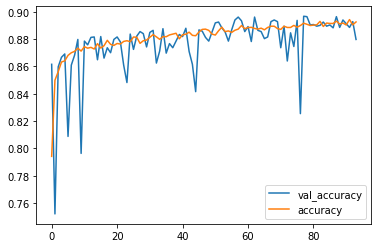

In [ ]:
loss[['val_accuracy','accuracy']].plot()

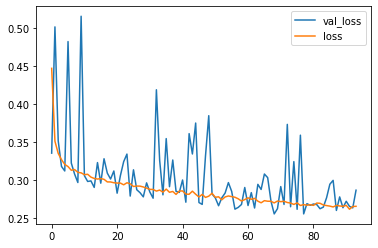

In [ ]:
loss[['val_loss','loss']].plot()

In [ ]:
preds = model.predict(X_test)

In [ ]:
preds = preds > 0.5

In [ ]:
preds

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(y_test,preds)

array([[1521,  129],
       [ 268, 1382]])

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1650
           1       0.91      0.84      0.87      1650

    accuracy                           0.88      3300
   macro avg       0.88      0.88      0.88      3300
weighted avg       0.88      0.88      0.88      3300



In [ ]:
model = Sequential()


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.10))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='rmsprop')

In [ ]:
result = model.fit(X_train,y_train, validation_data=validation_data,epochs=600,callbacks=[early_stop])

Epoch 1/600
310/310 [==============================] - 3s 6ms/step - loss: 0.4714 - accuracy: 0.7944 - val_loss: 0.4576 - val_accuracy: 0.7727
Epoch 2/600
310/310 [==============================] - 1s 4ms/step - loss: 0.3520 - accuracy: 0.8514 - val_loss: 0.3346 - val_accuracy: 0.8673
Epoch 3/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8601 - val_loss: 0.3591 - val_accuracy: 0.8527
Epoch 4/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8636 - val_loss: 0.3449 - val_accuracy: 0.8491
Epoch 5/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3212 - accuracy: 0.8685 - val_loss: 0.3679 - val_accuracy: 0.8442
Epoch 6/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3199 - accuracy: 0.8664 - val_loss: 0.3570 - val_accuracy: 0.8470
Epoch 7/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3167 - accuracy: 0.8687 - val_loss: 0.3132 - val_accuracy: 0.8733

In [ ]:
loss = pd.DataFrame(model.history.history)

In [ ]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.471362,0.794403,0.457603,0.772727
1,0.351969,0.851384,0.334613,0.867273
2,0.336175,0.860073,0.359149,0.852727
3,0.330204,0.863609,0.344940,0.849091
4,0.321214,0.868458,0.367873,0.844242
...,...,...,...,...
311,0.239796,0.904829,0.227957,0.906667
312,0.237845,0.904122,0.221512,0.910909
313,0.236276,0.906244,0.254836,0.895151
314,0.239612,0.902202,0.240633,0.909394


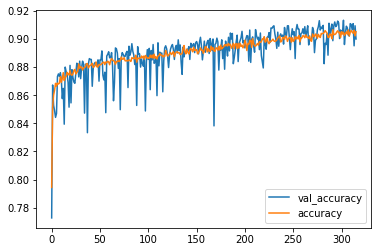

In [ ]:
loss[['val_accuracy','accuracy']].plot()

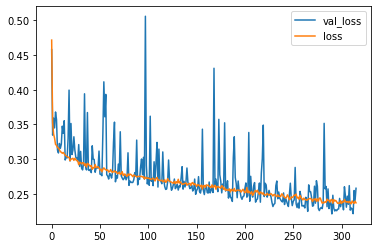

In [ ]:
loss[['val_loss','loss']].plot()

In [ ]:
preds = model.predict(X_test)
preds = preds > 0.5

In [ ]:
print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

[[1480  170]
 [ 160 1490]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1650
           1       0.90      0.90      0.90      1650

    accuracy                           0.90      3300
   macro avg       0.90      0.90      0.90      3300
weighted avg       0.90      0.90      0.90      3300



In [ ]:
model = Sequential()


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.10))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
result = model.fit(X_train,y_train, validation_data=validation_data,epochs=600,callbacks=[early_stop])

Epoch 1/600
310/310 [==============================] - 3s 6ms/step - loss: 0.4655 - accuracy: 0.7813 - val_loss: 0.3434 - val_accuracy: 0.8624
Epoch 2/600
310/310 [==============================] - 2s 7ms/step - loss: 0.3456 - accuracy: 0.8567 - val_loss: 0.3297 - val_accuracy: 0.8706
Epoch 3/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3322 - accuracy: 0.8614 - val_loss: 0.3418 - val_accuracy: 0.8539
Epoch 4/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3215 - accuracy: 0.8670 - val_loss: 0.3187 - val_accuracy: 0.8721
Epoch 5/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3223 - accuracy: 0.8673 - val_loss: 0.3147 - val_accuracy: 0.8727
Epoch 6/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.8687 - val_loss: 0.3160 - val_accuracy: 0.8691
Epoch 7/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3093 - accuracy: 0.8704 - val_loss: 0.3161 - val_accuracy: 0.8700

In [ ]:
preds = model.predict(X_test)
preds = preds > 0.5

In [ ]:
print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

[[1484  166]
 [ 181 1469]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1650
           1       0.90      0.89      0.89      1650

    accuracy                           0.89      3300
   macro avg       0.89      0.89      0.89      3300
weighted avg       0.89      0.89      0.89      3300



In [ ]:
result = model.fit(X_train,y_train, validation_data=validation_data,epochs=600,callbacks=[early_stop])

Epoch 1/600
310/310 [==============================] - 2s 6ms/step - loss: 0.2468 - accuracy: 0.8986 - val_loss: 0.2317 - val_accuracy: 0.9006
Epoch 2/600
310/310 [==============================] - 2s 5ms/step - loss: 0.2467 - accuracy: 0.8985 - val_loss: 0.2233 - val_accuracy: 0.9042
Epoch 3/600
310/310 [==============================] - 1s 5ms/step - loss: 0.2454 - accuracy: 0.8998 - val_loss: 0.2372 - val_accuracy: 0.9009
Epoch 4/600
310/310 [==============================] - 1s 3ms/step - loss: 0.2459 - accuracy: 0.8959 - val_loss: 0.2274 - val_accuracy: 0.9048
Epoch 5/600
310/310 [==============================] - 1s 3ms/step - loss: 0.2456 - accuracy: 0.8980 - val_loss: 0.2301 - val_accuracy: 0.9027
Epoch 6/600
310/310 [==============================] - 1s 3ms/step - loss: 0.2454 - accuracy: 0.8967 - val_loss: 0.2251 - val_accuracy: 0.9058
Epoch 7/600
310/310 [==============================] - 1s 3ms/step - loss: 0.2473 - accuracy: 0.8947 - val_loss: 0.2314 - val_accuracy: 0.9024

In [ ]:
losses = pd.DataFrame(model.history.history)

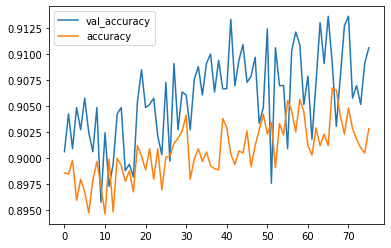

In [ ]:
losses[['val_accuracy','accuracy']].plot()

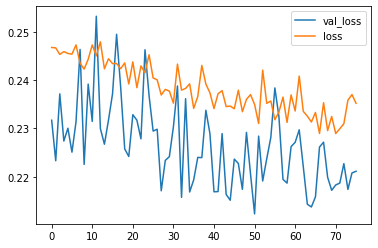

In [ ]:
losses[['val_loss','loss']].plot()

In [ ]:
preds = model.predict(X_test)

preds = preds > 0.5

In [ ]:
print(confusion_matrix(y_test, preds))

print(classification_report(y_test,preds))

[[1394  256]
 [  39 1611]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1650
           1       0.86      0.98      0.92      1650

    accuracy                           0.91      3300
   macro avg       0.92      0.91      0.91      3300
weighted avg       0.92      0.91      0.91      3300



In [ ]:
model.save('Bankruptcy detection 91% accuracy.h5')

In [ ]:
model2 = Sequential()


model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))

model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.10))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='rmsprop')

In [ ]:
result = model2.fit(X_train,y_train,validation_data=validation_data,epochs=600,callbacks=[early_stop])

Epoch 1/600
310/310 [==============================] - 2s 3ms/step - loss: 0.4769 - accuracy: 0.7908 - val_loss: 0.3503 - val_accuracy: 0.8591
Epoch 2/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3554 - accuracy: 0.8508 - val_loss: 0.3330 - val_accuracy: 0.8706
Epoch 3/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8549 - val_loss: 0.3311 - val_accuracy: 0.8685
Epoch 4/600
310/310 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.8610 - val_loss: 0.5559 - val_accuracy: 0.7555
Epoch 5/600
310/310 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8619 - val_loss: 0.3354 - val_accuracy: 0.8688
Epoch 6/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3216 - accuracy: 0.8665 - val_loss: 0.3109 - val_accuracy: 0.8739
Epoch 7/600
310/310 [==============================] - 1s 3ms/step - loss: 0.3204 - accuracy: 0.8684 - val_loss: 0.3095 - val_accuracy: 0.8715

In [ ]:
loss = pd.DataFrame(model2.history.history)

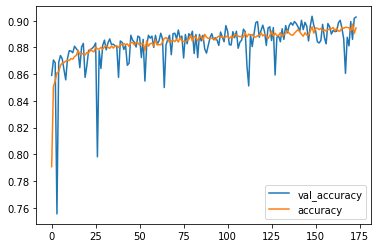

In [ ]:
loss[['val_accuracy','accuracy']].plot()

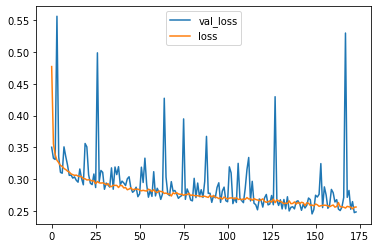

In [ ]:
loss[['val_loss','loss']].plot()

In [ ]:
preds = model2.predict(X_test)

preds = preds > 0.5

In [ ]:
print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

[[1430  220]
 [ 101 1549]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1650
           1       0.88      0.94      0.91      1650

    accuracy                           0.90      3300
   macro avg       0.90      0.90      0.90      3300
weighted avg       0.90      0.90      0.90      3300



In [ ]:
model2.save('90% Accuracy for bankcruptcy using ANN.h5')

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9898, 32)
(3300, 32)
(9898, 1)
(3300, 1)


In [ ]:
error_rate=[]
for i in range(1,100):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred=KNN.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


ValueError: ignored

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
pred = KNN.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[1462  188]
 [   4 1646]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1650
           1       0.90      1.00      0.94      1650

    accuracy                           0.94      3300
   macro avg       0.95      0.94      0.94      3300
weighted avg       0.95      0.94      0.94      3300



In [ ]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)
pred = KNN.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[1535  115]
 [   4 1646]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1650
           1       0.93      1.00      0.97      1650

    accuracy                           0.96      3300
   macro avg       0.97      0.96      0.96      3300
weighted avg       0.97      0.96      0.96      3300



In [ ]:
import pickle

kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X_train,y_train)

# Its important to use binary mode
knnPickle = open('KNN_model_bankruptcy', 'wb')

# source, destination
pickle.dump(KNN, knnPickle)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
loaded_model = pickle.load(open('KNN_model_bankruptcy', 'rb'))
result = loaded_model.predict(X_test)

In [ ]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1650
           1       0.93      1.00      0.97      1650

    accuracy                           0.96      3300
   macro avg       0.97      0.96      0.96      3300
weighted avg       0.97      0.96      0.96      3300



**Random Forest**

In [ ]:
from sklearn.metrics import auc, roc_curve

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def metrics(target, pred):
  fpr,tpr,threshold = roc_curve(target,pred)
  return auc(fpr,tpr)

In [ ]:
Rf = RandomForestClassifier()
model_Rf = Rf.fit(X_train, y_train)
preds = model_Rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print(metrics(y_test,preds))

0.9772727272727274


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1650
           1       0.97      0.99      0.98      1650

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



In [ ]:
import pickle

Rf = RandomForestClassifier()
model_Rf = Rf.fit(X_train, y_train)

filename = 'Bankruptcy_detection_using_random_forest_98%_accuracy.sav'
pickle.dump(model_Rf, open(filename, 'wb'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import cv2

In [ ]:
df = pd.read_csv("/content/final_df.csv")

In [ ]:
df.head()

,Unnamed: 0,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),...,Total expense/Assets,Current Liability to Equity,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity
0,0,1,0.370594,0.424389,0.405750,0.601457,0.0,0.147950,0.147950,0.147950,...,0.064856,0.339077,0.126549,0.520382,0.118250,0,0.716845,0.601453,0.827890,0.290202
1,1,1,0.464291,0.538214,0.516730,0.610235,0.0,0.182251,0.182251,0.182251,...,0.025516,0.329740,0.120916,0.567101,0.047775,0,0.795297,0.610237,0.839969,0.283846
2,2,1,0.426071,0.499019,0.472295,0.601450,0.0,0.177911,0.177911,0.193713,...,0.021387,0.334777,0.117922,0.538491,0.025346,0,0.774670,0.601449,0.836774,0.290189
3,3,1,0.399844,0.451265,0.457733,0.583541,0.0,0.154187,0.154187,0.154187,...,0.024161,0.331509,0.120760,0.604105,0.067250,0,0.739555,0.583538,0.834697,0.281721
4,4,1,0.465022,0.538432,0.522298,0.598783,0.0,0.167502,0.167502,0.167502,...,0.026385,0.330726,0.110933,0.578469,0.047725,0,0.795016,0.598782,0.839973,0.278514


In [ ]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,...,Total expense/Assets,Current Liability to Equity,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity
0,1,0.370594,0.424389,0.405750,0.601457,0.0,0.147950,0.147950,0.147950,0.169141,...,0.064856,0.339077,0.126549,0.520382,0.118250,0,0.716845,0.601453,0.827890,0.290202
1,1,0.464291,0.538214,0.516730,0.610235,0.0,0.182251,0.182251,0.182251,0.208944,...,0.025516,0.329740,0.120916,0.567101,0.047775,0,0.795297,0.610237,0.839969,0.283846
2,1,0.426071,0.499019,0.472295,0.601450,0.0,0.177911,0.177911,0.193713,0.180581,...,0.021387,0.334777,0.117922,0.538491,0.025346,0,0.774670,0.601449,0.836774,0.290189
3,1,0.399844,0.451265,0.457733,0.583541,0.0,0.154187,0.154187,0.154187,0.193722,...,0.024161,0.331509,0.120760,0.604105,0.067250,0,0.739555,0.583538,0.834697,0.281721
4,1,0.465022,0.538432,0.522298,0.598783,0.0,0.167502,0.167502,0.167502,0.212537,...,0.026385,0.330726,0.110933,0.578469,0.047725,0,0.795016,0.598782,0.839973,0.278514


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


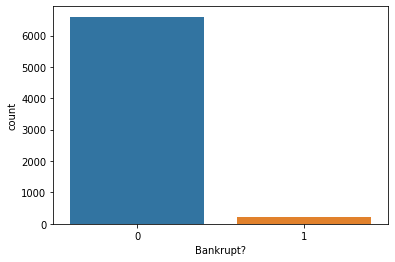

In [ ]:
sns.countplot(df['Bankrupt?'])

In [ ]:
columns = []
for i in df.columns:
  columns.append("{}".format(i))

In [ ]:
columns

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Working Capital to Total Assets',
 ' Cash/Total Assets',
 ' Current Liability to Assets',
 ' Working Capital/Equity',
 ' Current Liabilities/Equity',
 ' Retained Earnings to Total Assets',
 ' Total expense/Assets',
 ' Current Liability to Equity',
 ' Equity to Long-term Liability',
 ' CFO to Assets',
 ' Current Liability to Current Assets',
 ' Liability-Assets Flag',
 ' Net Income to Total Assets',
 ' Gross 